## Understanding Data Set and Attribute Information:

Title: Qualitative_Bankruptcy database

Source Information

-- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
-- Guided By: Dr.V.Prasanna Venkatesan

-- Date:      February 2014

1.Past Usage: The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of experts’ decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.

2.Number of Instances: 250

3.Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy

4.Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

a. Industrial Risk: {P,A,N}
b. Management Risk: {P,A,N}
c. Financial Flexibility: {P,A,N}
d. Credibility: {P,A,N}
e. Competitiveness: {P,A,N}
f. Operating Risk: {P,A,N}
g. Class: {B,NB}

5.Internal Risks:

i.Industry risk (IR) : 
    Government policies and International agreements, 
    Cyclicality, Degree of competition,
    The price and stability of market supply, 
    The size and growth of market demand,
    The sensitivity to changes in macroeconomic factors, 
    Domestic and international competitive power, 
    Product Life Cycle. 

ii.Management risk(MR): 
    Ability and competence of management, 
    Stability of management, 
    The relationship between management/ owner, 
    Human resources management, Growth process/business performance, 
    Short and long term business planning, achievement and feasibility. 
    
iii.Financial Flexibility(FF): 
     Direct financing, 
     Indirect financing, 
     Other financing 
     
iv.Credibility (CR):
    Credit history,
    reliability of information, 
    The relationship with financial institutes. 
  
v.Competitiveness (CO):
    Market position, 
    The level of core capacities, 
    Differentiated strategy, 
    
vi.Operating Risk (OP):
    The stability and diversity of procurement, 
    The stability of transaction, The efficiency of production, The prospects for demand for product and service, Sales diversification, Sales price and settlement condition, Collection of A/R, Effectiveness of sale network.

6.Missing Attribute Values: None

7.Class Distribution: [143 instances For Non-Bankruptcy] 
                    [107 instances For Bankruptcy]

Information about the dataset
CLASSTYPE: nominal

## Importing Libraries:

In [1]:
import pandas as pd
import scipy as scp
import numpy as np
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
import sklearn.preprocessing as preproc
## for train & test split
from sklearn.model_selection import train_test_split  
## calculation of MSE & RMSE
from sklearn import metrics  

# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Objectives of the Project 

Please follow the below steps to complete the project ( 30 points)
1. Read the dataset and understand the features and target variable. 2 points
2. Encode independent features. 2 points
3. Separate the dependant variable from the rest of the train data 1 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5. Apply PCA on the independent features of train data. 1 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance). 3 points
7. Transform the data using PCA ( select optimum number of PCs). 2 points
8. Apply KMeans algorithm on the above transformed data. 3 points
9. Select optimal number of clusters and form clusters out of the train data. 5 points
10. Create a new column in the train data and populate it with the cluster labels. 2 points
11. Transform the test data using the same PCA object that was fit on the train data. 2 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature. 2 points
13. Apply any classification model (example: Logistic Regression) on train dataset and
predict target for test dataset. 3 points
14. Check accuracy and confusion matrix. 1 point

1. Read the dataset and understand the features and target variable. (2 points)

In [2]:
QualBank_df = pd.read_csv("Qualitative_Bankruptcy.data.txt")

In [3]:
QualBank_df = pd.read_csv("Qualitative_Bankruptcy.data.txt", names =["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])

In [4]:
QualBank_df.shape

(250, 7)

In [5]:
QualBank_df.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [6]:
##summarry of data set

QualBank_df.describe().transpose()

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [7]:
for col in QualBank_df:
    print (col)
    print (QualBank_df[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


In [8]:
QualBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [9]:
qben_df = QualBank_df.drop("Class", axis=1)
qben_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


##The data in the columns are in categorical text form. The data should be converted into numerical form using One Hot Encoding  to conduct the required Exploratory Data Analysis (EDA).
##Encode independent features. 2 points
##Storing the dependent variables to xVal and independent variable to yVal

In [10]:
column = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk']
def func_labelEncoder(column,features):
    encode= LabelEncoder()
    features[column] = encode.fit_transform(features[column].astype(str))    
for i in column:
    func_labelEncoder(i,qben_df)

In [11]:
qben_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [12]:
qben_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,0.996,0.804096,0.0,0.0,1.0,2.0,2.0
Management Risk,250.0,0.972,0.724788,0.0,0.0,1.0,1.0,2.0
Financial Flexibility,250.0,0.932,0.722123,0.0,0.0,1.0,1.0,2.0
Credibility,250.0,1.008,0.791481,0.0,0.0,1.0,2.0,2.0
Competitiveness,250.0,1.140,0.755435,0.0,1.0,1.0,2.0,2.0
Operating Risk,250.0,1.088,0.733764,0.0,1.0,1.0,2.0,2.0


In [13]:
qben_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000


Inference - Correlation between different variables are between -0.5 to 0.5, 
Conclusion - all variables should be considered for the development of the prediction model.

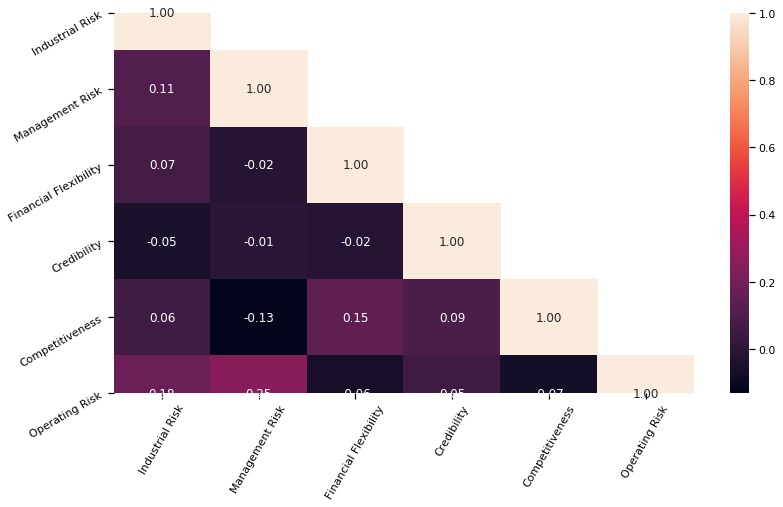

In [14]:
#Graphical representation of correlations between features
corr = qben_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [15]:
qben_df.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
dtype: bool

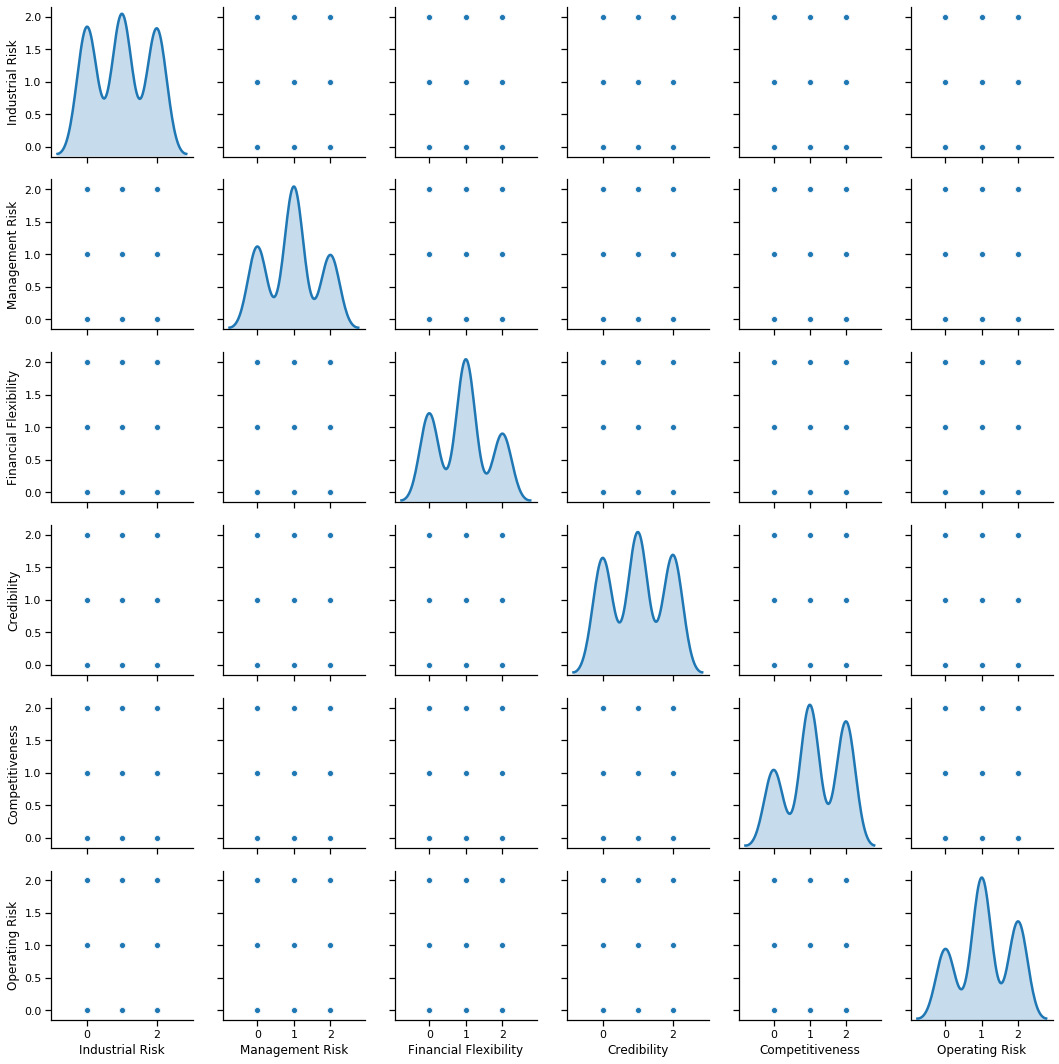

In [16]:
sns.pairplot(qben_df,diag_kind='kde')

In [17]:
OHE = OneHotEncoder()
xVal = OHE.fit_transform(qben_df).toarray()
yVal = QualBank_df["Class"]
xVal

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [18]:
xVal.shape

(250, 18)

In [19]:
yVal.shape

(250,)

##Split the whole dataset into test and train row.The train data will be 80% of the total dataset and test data will be 20% of the dataset.

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(xVal, yVal, test_size=0.2, random_state=20)
print("X_train shape -- > {}".format(X_train.shape))
print("Y_train shape -- > {}".format(Y_train.shape))
print("X_test shape -- > {}".format(X_test.shape))
print("Y_test shape -- > {}".format(Y_test.shape))

X_train shape -- > (200, 18)
Y_train shape -- > (200,)
X_test shape -- > (50, 18)
Y_test shape -- > (50,)


##Applying PCA on the independent features of the Train data

In [21]:
pca = PCA(n_components =  None)
pca.fit(X_train)
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
print("Variance Values \n" , var_explained , '\n')
print("Cummulative Variance Values \n" , cum_var_exp)

Variance Values 
 [2.72033913e-01 1.22774194e-01 9.92689428e-02 9.50708929e-02
 7.99169074e-02 7.50773154e-02 6.90029634e-02 5.59487061e-02
 4.92247318e-02 4.25979525e-02 2.67901312e-02 1.22933500e-02
 7.86800191e-32 3.01333519e-32 1.01733239e-32 3.76114859e-33
 3.24535039e-33 2.72418303e-33] 

Cummulative Variance Values 
 [0.27203391 0.39480811 0.49407705 0.58914794 0.66906485 0.74414217
 0.81314513 0.86909383 0.91831857 0.96091652 0.98770665 1.
 1.         1.         1.         1.         1.         1.        ]


In [22]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 2.20477387e-01 -1.17587940e-01 -1.02889447e-01  6.25628141e-02
  -6.63316583e-02  3.76884422e-03  1.08040201e-02  5.77889447e-03
  -1.65829146e-02  7.53768844e-03 -2.18592965e-02  1.43216080e-02
   1.03015075e-02 -2.16080402e-02  1.13065327e-02  4.04522613e-02
  -4.48492462e-02  4.39698492e-03]
 [-1.17587940e-01  2.31557789e-01 -1.13969849e-01 -6.75376884e-02
   9.26633166e-02 -2.51256281e-02 -1.44723618e-02  3.37688442e-02
  -1.92964824e-02 -8.04020101e-03  1.96984925e-02 -1.16582915e-02
  -2.79396985e-02  6.91457286e-02 -4.12060302e-02 -7.83919598e-03
   4.50251256e-02 -3.71859296e-02]
 [-1.02889447e-01 -1.13969849e-01  2.16859296e-01  4.97487437e-03
  -2.63316583e-02  2.13567839e-02  3.66834171e-03 -3.95477387e-02
   3.58793970e-02  5.02512563e-04  2.16080402e-03 -2.66331658e-03
   1.76381910e-02 -4.75376884e-02  2.98994975e-02 -3.26130653e-02
  -1.75879397e-04  3.27889447e-02]
 [ 6.25628141e-02 -6.75376884e-02  4.97487437e-03  1.98090452e-01
  -1.30251256e-

#Plotting the Cumulative Summation of the Explained Variance

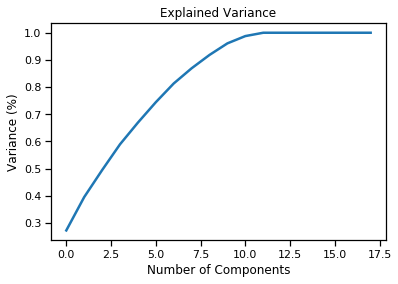

In [23]:
plt.figure()
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [62]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [64]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.07724127 -0.47970379 -0.09879866  0.24864687 -0.0312106  -0.11574271
   0.15099286 -0.20216241 -0.13496484 -0.04279002 -0.45381031  0.23445475
   0.07612661 -0.03746857 -0.06986041  0.18971191 -0.38962991 -0.17270448]
 [ 0.17666579  0.42372591 -0.12945927  0.30395589  0.12564307 -0.04795888
  -0.1095805  -0.08173867 -0.23965477 -0.14613574  0.41061647 -0.25018405
   0.07612661 -0.03746857 -0.06986041  0.18971191 -0.38962991 -0.17270448]
 [-0.09942452  0.05597789  0.22825793 -0.55260275 -0.09443246  0.16370159
  -0.04141237  0.28390108  0.37461961  0.18892576  0.04319384  0.01572931
   0.07612661 -0.03746857 -0.06986041  0.18971191 -0.38962991 -0.17270448]
 [-0.07323818 -0.42851522  0.25162904  0.09359686 -0.01478517  0.14464831
   0.06592279 -0.04053038  0.18660762 -0.41846363  0.3123993  -0.26634978
  -0.55796064  0.13472226 -0.05281028  0.04516498 -0.06979537 -0.04952767]
 [ 0.24730818  0.37901909 -0.15742465  0.21088686 -0.01292455 -0.01742601
  -0.09423104  0

In [65]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.20339126  39.48081066  49.40770494  58.91479423  66.90648497
  74.41421651  81.31451284  86.90938345  91.83185663  96.09165188
  98.770665   100.         100.         100.         100.
 100.         100.         100.        ]


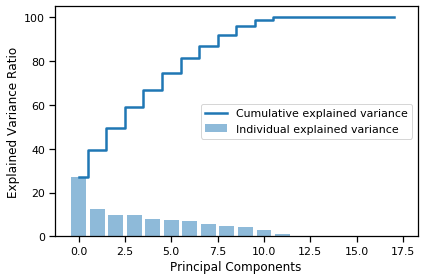

In [67]:
plt.figure(figsize=(6,4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

##NOTE: First 10 principal components of train data explain > 95 % of the variance in the data

In [69]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
X_std = StandardScaler().fit_transform(X_train)
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:100]

,num_clusters,cluster_errors
0,1,3600.000000
1,2,2767.420723
2,3,2474.598850
3,4,2272.170179
4,5,2111.054382
5,6,1965.817444
6,7,1878.863328
7,8,1780.352362
8,9,1684.979631


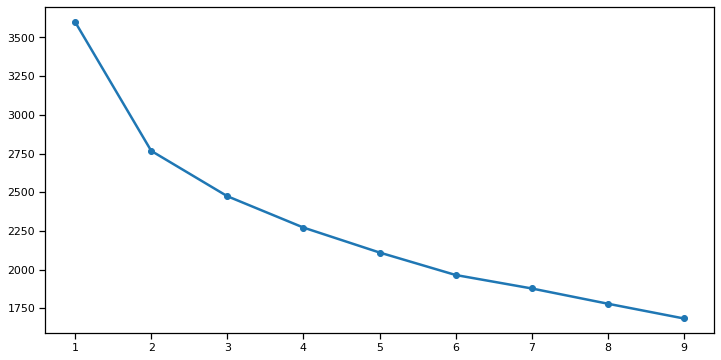

In [57]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Note: Elbow bends at "2", concluding 2 clusters. 

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
print(__doc__)
cluster_range = range(2, 18)
print(cluster_range)
X_std = StandardScaler().fit_transform(X_train)
y_std = Y_train
X = X_std 
y = y_std.flatten()

print(X.shape)
print(X)
type(X)
print(X.ndim)
print(y.shape)
type(y)
print(y.ndim)
print(y)

Automatically created module for IPython interactive environment
range(2, 18)


AttributeError: 'Series' object has no attribute 'flatten'

For n_clusters = 2 The average silhouette_score is : 0.22419280028271643


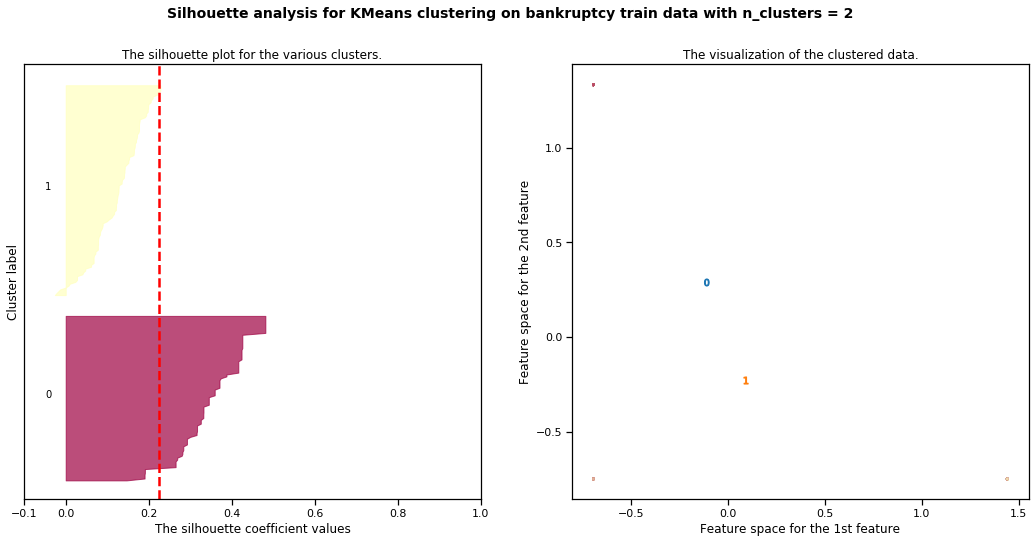

For n_clusters = 3 The average silhouette_score is : 0.23099281056923793


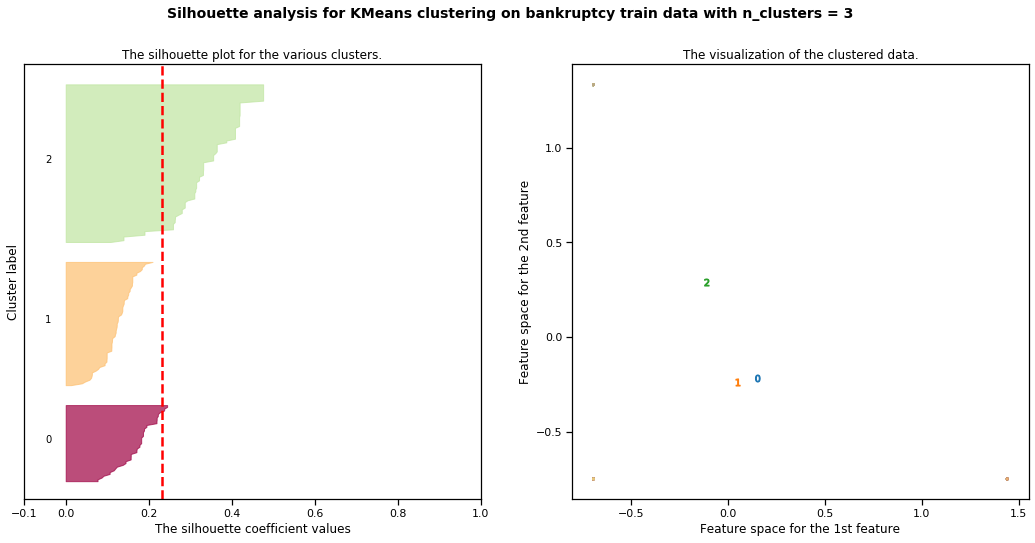

For n_clusters = 4 The average silhouette_score is : 0.22812845732097106


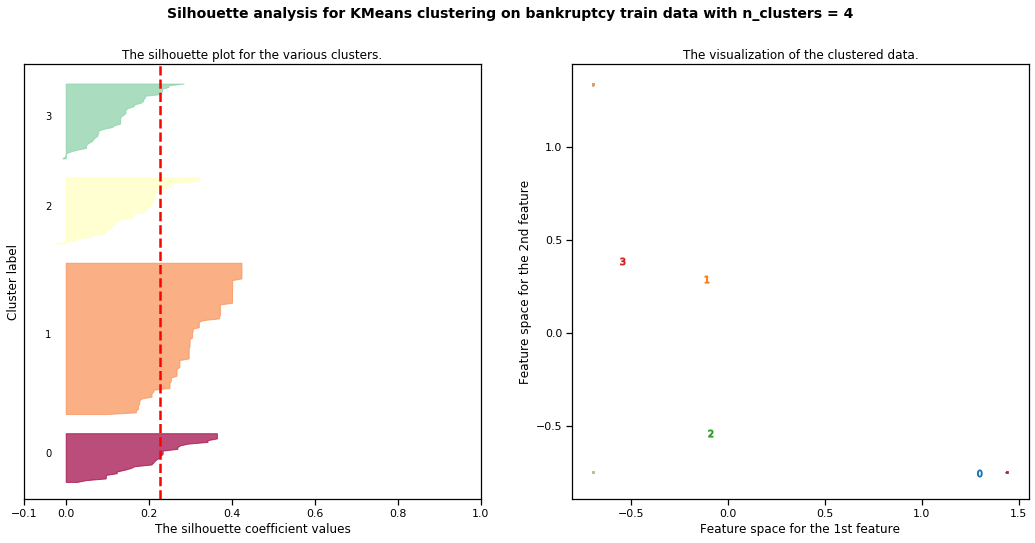

For n_clusters = 5 The average silhouette_score is : 0.1805278959563457


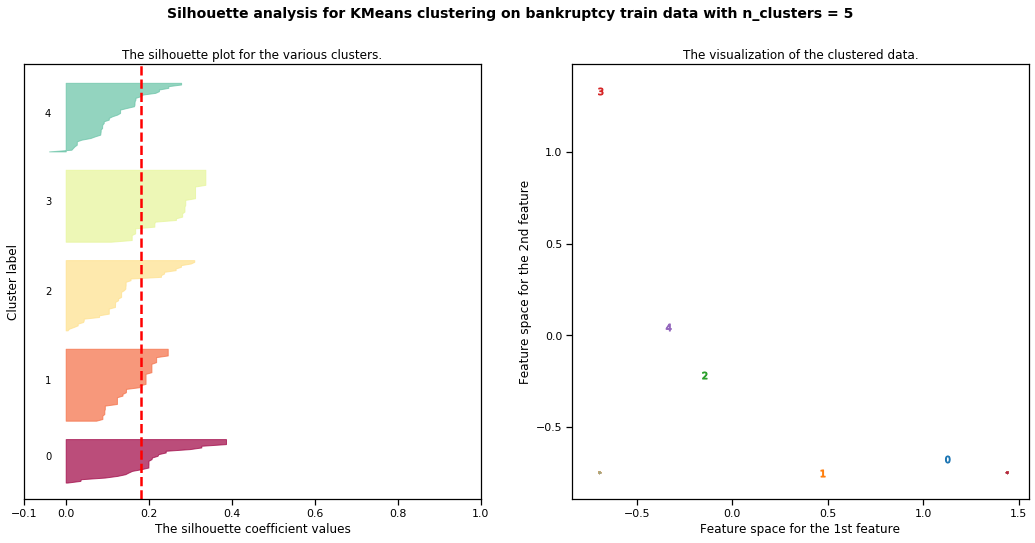

For n_clusters = 6 The average silhouette_score is : 0.18963822319480506


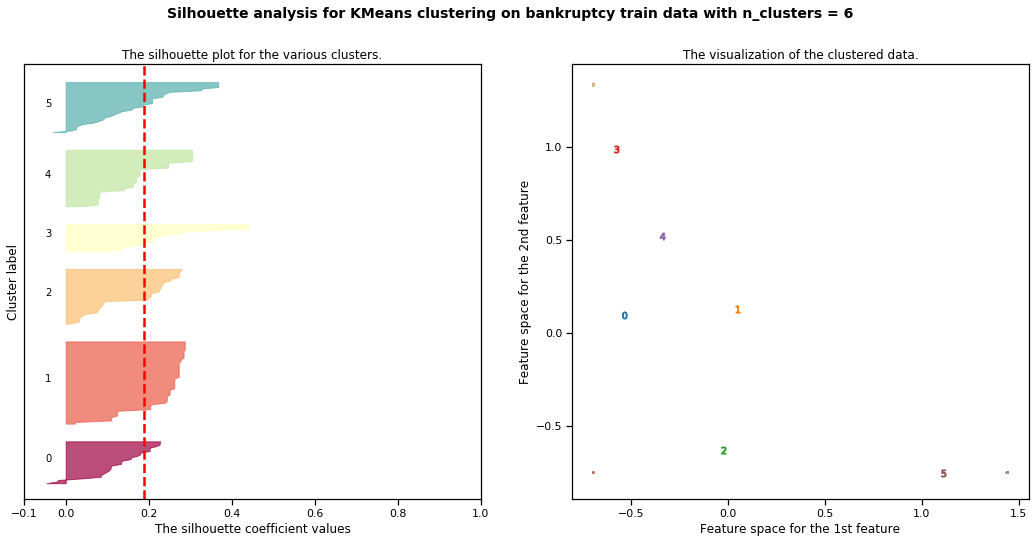

For n_clusters = 7 The average silhouette_score is : 0.18780199620835497


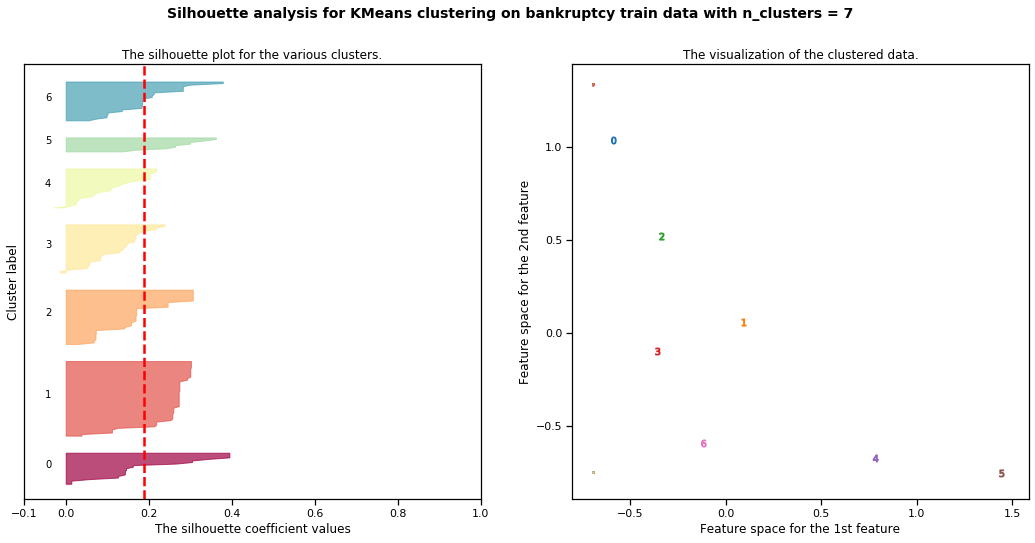

For n_clusters = 8 The average silhouette_score is : 0.2019762712278596


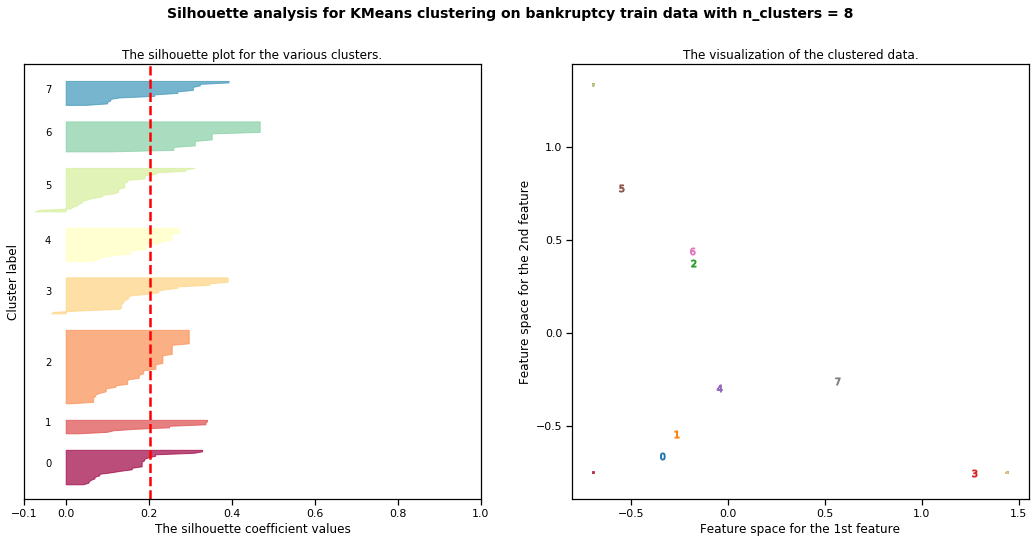

For n_clusters = 9 The average silhouette_score is : 0.19898189758689738


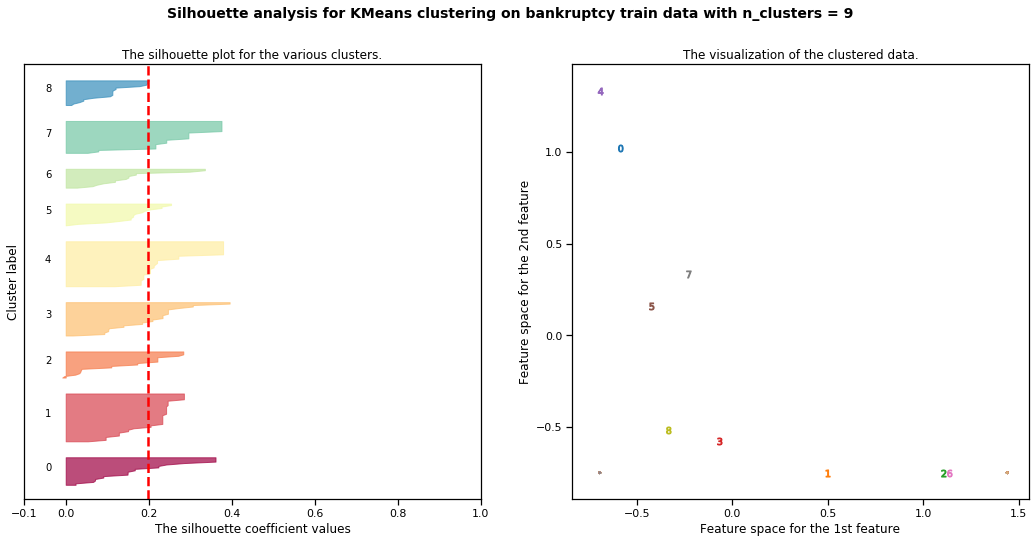

For n_clusters = 10 The average silhouette_score is : 0.2142154657584332


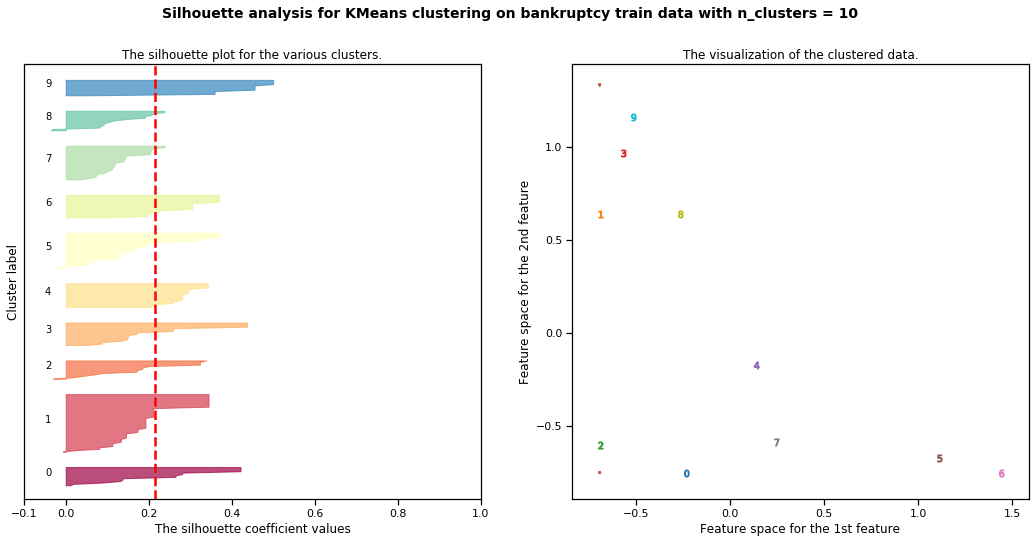

For n_clusters = 11 The average silhouette_score is : 0.2179377822663463


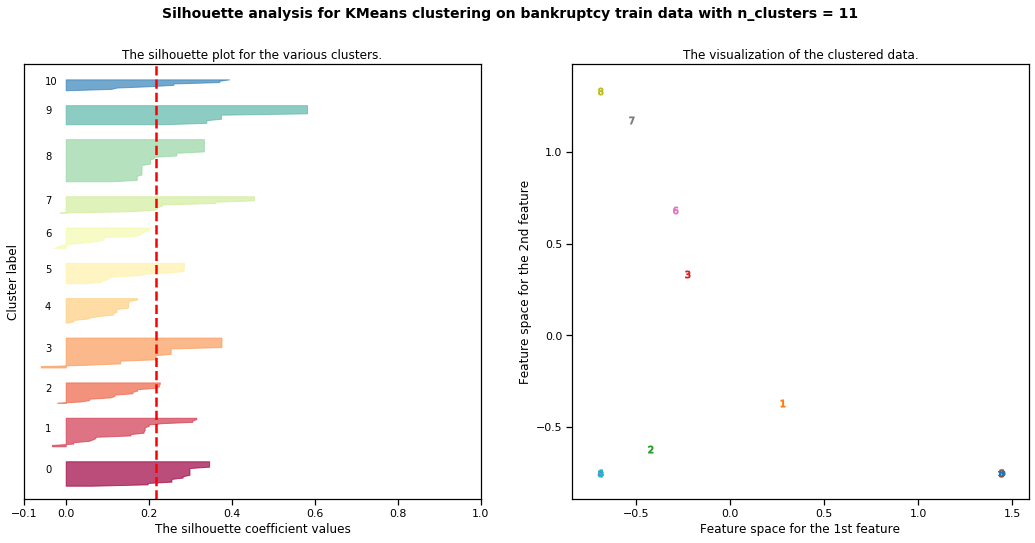

For n_clusters = 12 The average silhouette_score is : 0.23768307972289496


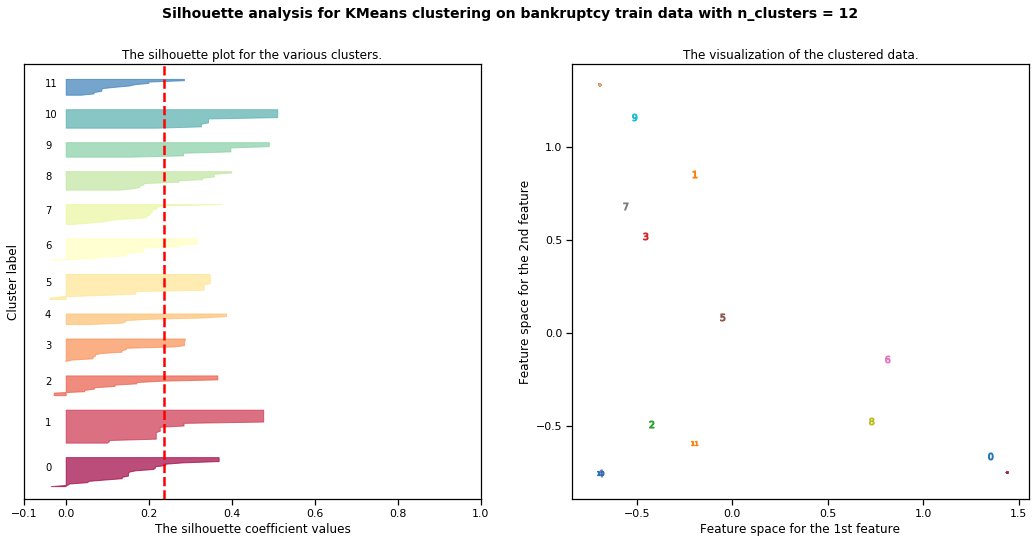

For n_clusters = 13 The average silhouette_score is : 0.2318081486976448


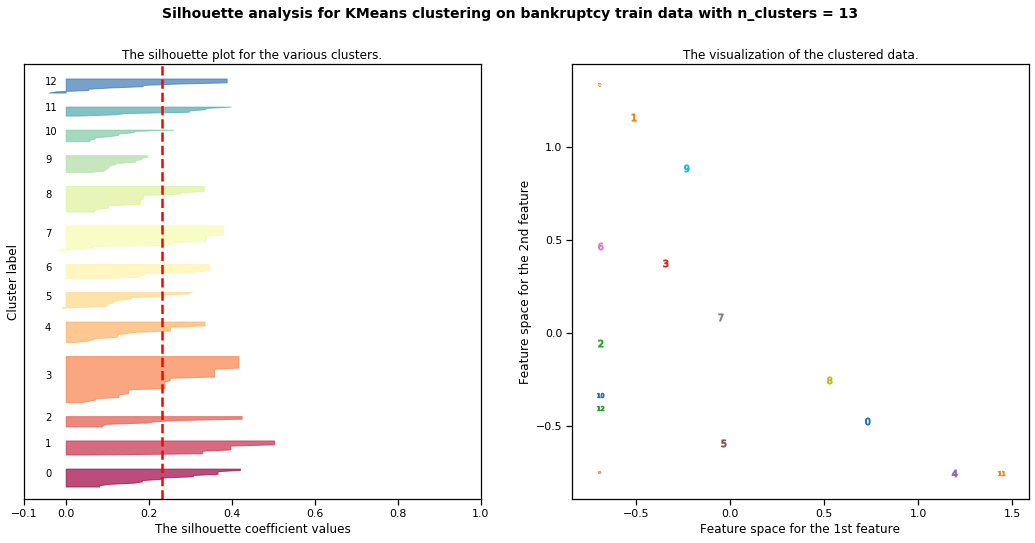

For n_clusters = 14 The average silhouette_score is : 0.23834634137004343


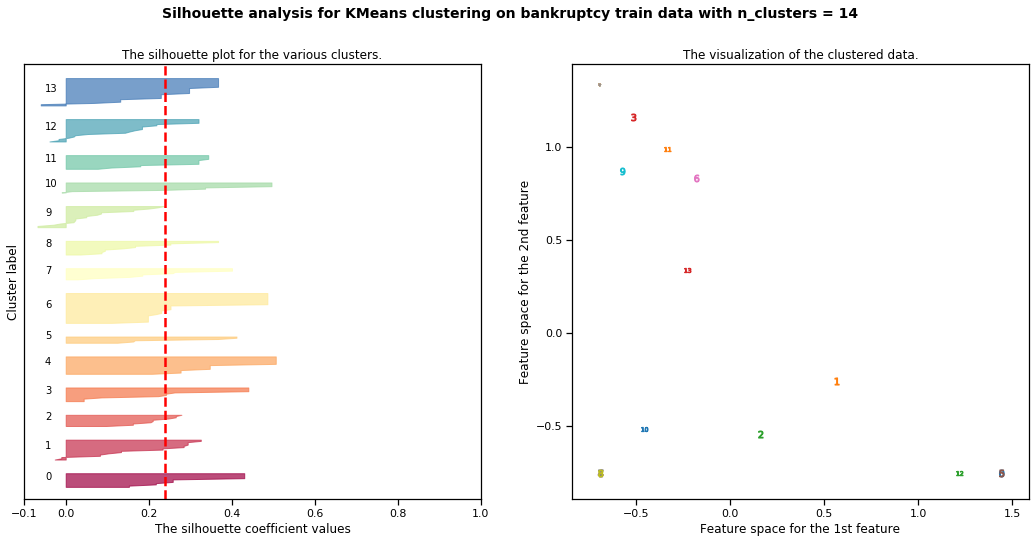

For n_clusters = 15 The average silhouette_score is : 0.25599426771736544


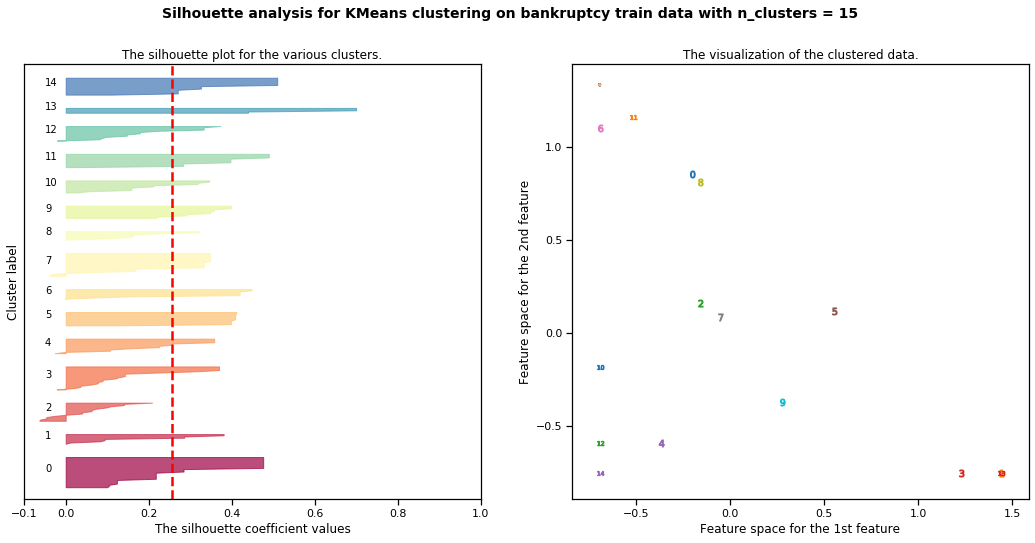

For n_clusters = 16 The average silhouette_score is : 0.2503011467003828


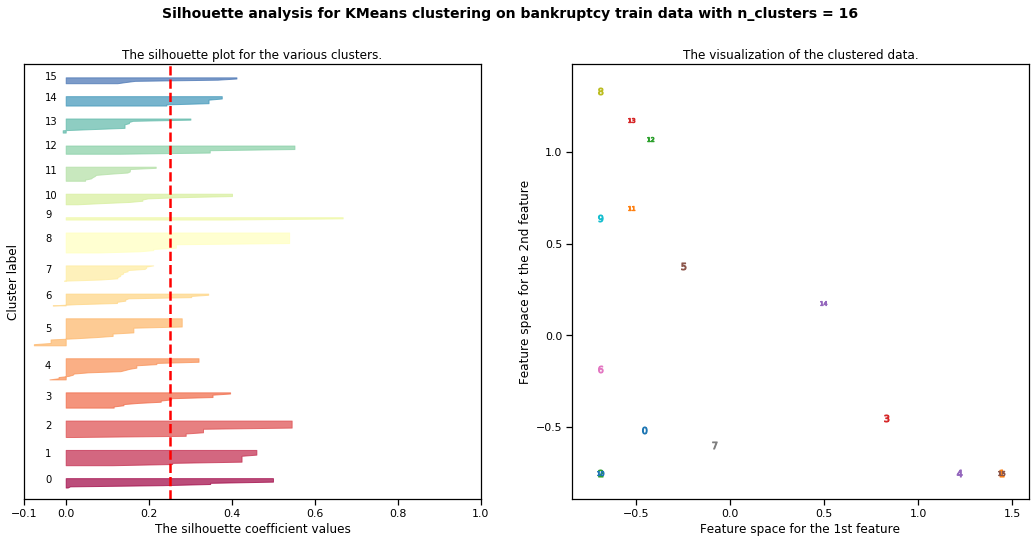

For n_clusters = 17 The average silhouette_score is : 0.28854646215203483


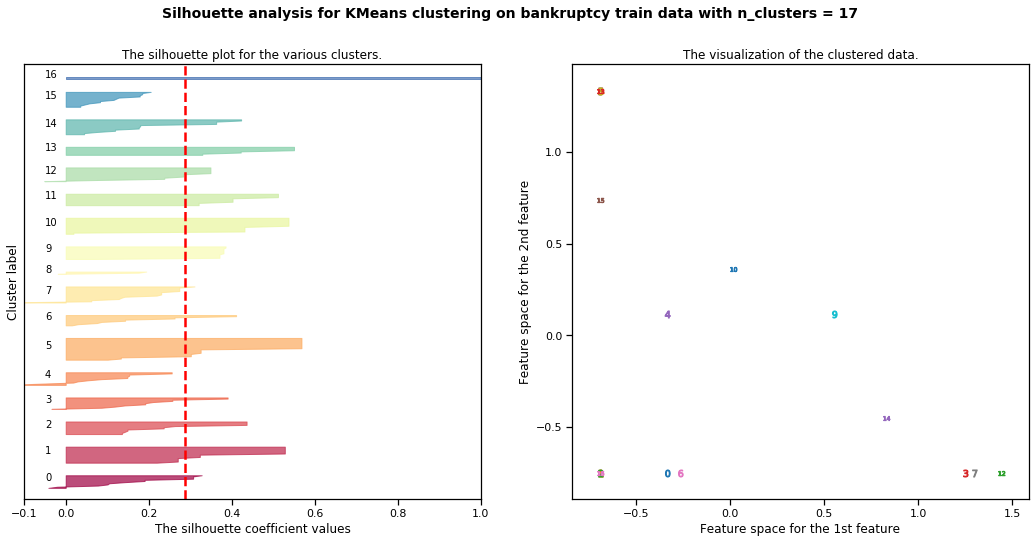

In [60]:
for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters, random_state=10)
    #print(clusterer)
    clusterer = clusterer.fit(X)
    clusterer_labels = clusterer.labels_     # capture the cluster lables
    
    #clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    #cluster_labels = clusterer.fit_predict(X_train)
    
    #print("For n_clusters =", n_clusters,
    #      "The clusterer_labels is :", clusterer_labels)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)
    #print("For n_clusters =", n_clusters,
    #      "The sample silhouette_value is :", sample_silhouette_values)
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusterer_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(clusterer_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.5,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on bankruptcy train data "
        "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()

##NOTE: The silhouette plot shows that the values of n_clusters = 3, 4 or 5. These are not recommended due to wide fluctuations in the silhouette plots. The value of n_cluster=2 is most prefferred as the plots are of similar thickness.


##Applying k-means algo on the transformed data by selecting optimal no. of clusters derived from elbow plot and silhoutte analysis. clustering out the train data into labels.

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_std)
# Getting the cluster labels
labels = kmeans.predict(X_std)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids) # From sci-kit learn
print("labels")
print(labels) # From sci-kit learn

sklearn
Centroid values
[[-0.11160447  0.29166667 -0.18885743 -0.14743361  0.40395966 -0.31491833
  -0.563972    0.9520086  -0.531085   -0.30748885  0.90116968 -0.64570968
  -0.46552747  1.08304375 -0.70997473  0.04752485  0.2478678  -0.3056992 ]
 [ 0.08768923 -0.22916667  0.14838798  0.11584069 -0.31739688  0.24743583
   0.44312086 -0.74800676  0.41728107  0.24159838 -0.70806189  0.50734332
   0.36577158 -0.85096294  0.55783729 -0.03734095 -0.19475327  0.24019223]]
labels
[1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1]


##creating new column in the train data and populate it with cluster labels
##transform the test data using the PCA object
##using k-means object, assign cluster labels to test data and storing the same in test data

In [35]:
X_train.shape

(200, 18)

In [36]:
labels.shape

(200,)

In [37]:
df = pd.DataFrame(X_train)
df.insert(18, "Cluster Labels", labels, True)

In [38]:
X_train.shape

(200, 18)

##Using k-means object, assign cluster labels & store the same in test data

In [39]:
labels = kmeans.predict(X_test)

In [40]:
X_test.shape

(50, 18)

In [41]:
labels.shape

(50,)

In [42]:
df = pd.DataFrame(X_test)
df.insert(18, "Cluster Labels", labels, True)

##Transforming the test data by using PCA object

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_train)
#X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#print(X_train_pca.shape)
print(X_test_pca.shape)

(50, 18)


##Applying SVC models on train data and target prediction 

#### Linear SVC Model 

In [44]:
from sklearn.svm import SVC
#Liner SVC Model
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

In [45]:
#Accuracy Score
# check the accuracy on the training set
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.985
0.98


In [46]:
#Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[19  0]
 [ 1 30]]


#### Poly SVC model

In [47]:
# Poly SVC Model
# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
#Accuracy 
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.96
0.92


In [49]:
#Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[16  0]
 [ 4 30]]


#### RBF SVC Model

In [50]:
#RBF SVC Model
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
#accuracy
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

1.0
1.0


In [52]:
#Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[20  0]
 [ 0 30]]


#### Sigmoid SVC model

In [53]:
#Sigmoid SVC Model
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
# Accuracy
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.985
0.98


In [55]:
#Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[19  0]
 [ 1 30]]


##NOTE: The best model inferred based on the above scores is the RBS SVC Model with 100% accuracy and the best confustion matrix. 